In [1]:
import mxnet as mx
import numpy as np
import os, time, shutil
import gluoncv
import matplotlib.pyplot as plt

from mxnet import gluon, image, init, nd
from mxnet import autograd as ag
from mxnet.gluon import nn
from mxnet.gluon.data.vision import transforms
from gluoncv.utils import makedirs
from gluoncv.model_zoo import get_model
from gluoncv import utils

/home/lsh/.local/lib/python2.7/site-packages/gluoncv/utils/version.py:53: DeprecationWarning: Python2 has reached the end of its life on January 1st, 2020. A future version of gluoncv will drop support for Python 2.
  warnings.warn(msg, DeprecationWarning)


In [2]:
num_gpus = 1
num_workers = 8
ctx = [mx.gpu(i) for i in range(num_gpus)] if num_gpus > 0 else [mx.cpu()]
print(ctx)

[gpu(0)]


In [3]:
model_name = 'ResNet50_v2'
finetune_net = get_model(model_name, classes=23)

net_name = "finetune_net.params"
finetune_net.load_parameters(net_name, ctx=ctx)

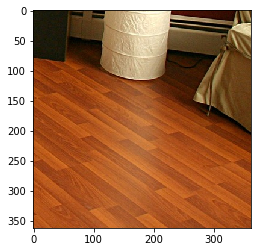

In [4]:
#url = 'https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/classification/plane-draw.jpeg'
#im_fname = utils.download(url)
#img = image.imread(im_fname)


filename = 'wood.jpg'
img = image.imread(filename)

plt.imshow(img.asnumpy())
plt.show()

In [5]:
import gluoncv
transformed_img = gluoncv.data.transforms.presets.imagenet.transform_eval(img)

In [6]:
transform_fn = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [7]:
pred = finetune_net(transformed_img.as_in_context(mx.gpu(0)))

The input picture is classified as [food], with probability 0.520.


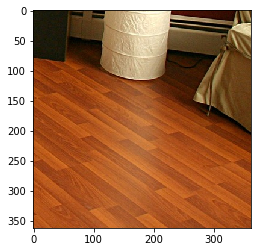

In [8]:
class_names = ['brick', 'carpet', 'ceramic', 'fabric', 'foliage', 'food', 'glass', 'hair', 'leather', 'metal', 'mirror', 'other', 'painted', 'paper', 'plastic', 'polishedstone', 'skin', 'sky', 'stone', 'tile', 'wallpaper', 'water', 'wood']
ind = nd.argmax(pred, axis=1).astype('int')
plt.imshow(img.asnumpy())
plt.show
print('The input picture is classified as [%s], with probability %.3f.'%
      (class_names[ind.asscalar()], nd.softmax(pred)[0][ind].asscalar()))

In [9]:
#per_device_batch_size = 1
#batch_size = per_device_batch_size * max(num_gpus, 1)

#path = '~/data/minc-2500'
#train_path = os.path.join(path, 'train')
#val_path = os.path.join(path, 'val')
#test_path = os.path.join(path, 'test')

#test_data = gluon.data.DataLoader(
#    gluon.data.vision.ImageFolderDataset(test_path).transform_first(transform_fn),
#    batch_size=batch_size, shuffle=False, num_workers = num_workers)

#def test(net, val_data, ctx):
#    metric = mx.metric.Accuracy()
#    for i, batch in enumerate(val_data):
#        data = gluon.utils.split_and_load(batch[0], ctx_list=ctx, batch_axis=0, even_split=False)
#        label = gluon.utils.split_and_load(batch[1], ctx_list=ctx, batch_axis=0, even_split=False)
#        outputs = [net(X) for X in data]
#        metric.update(label, outputs)
#    return metric.get()

#_, test_acc = test(finetune_net, test_data, ctx)
#print('[Finished] Test-acc: %.3f' % (test_acc))

In [10]:
print(pred)


[[-7.0934086  -4.2918673   3.1498818  -1.6395867  -1.601985    8.922608
   0.34914333  8.089964   -2.0476773   0.63061696 -3.642987   -0.3777634
   3.396755    2.4430852   8.157913    4.6039896   1.9762412  -2.378224
  -8.667883   -2.5138872  -3.33064    -3.909568   -0.13386407]]
<NDArray 1x23 @gpu(0)>


In [11]:
print(ind)


[5]
<NDArray 1 @gpu(0)>
